In [1]:
# ----------------------------------------------------------------------------
#
# TITLE - validate_coordinates.ipynb
# AUTHOR - James Lane
# PROJECT - AST 1501
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Make sure the sense of the coordinates is correct
'''

__author__ = "James Lane"

In [12]:
### Imports

## Basic
import numpy as np
import sys, os, pdb
# import glob
# import subprocess
# import copy

## Plotting
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm

## Astropy
from astropy.io import fits
from astropy import table
from astropy import units as apu
from astropy.coordinates import CartesianDifferential

## Scipy
from scipy.stats import binned_statistic

In [3]:
### Change Jupyter settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
### Matplotlib

plt.rc('font', size=12)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', facecolor='White')

In [8]:
### Load catalogs
# Names
astronn_catalog_fname = '../../data/astronn/dr16_astronn.npy'

# Load and extract data
astronn_data = np.load(astronn_catalog_fname)

In [10]:
print('Catalog names:')
for name in astronn_data.dtype.names:
    print(name)
####

Catalog names:
APSTAR_ID
TARGET_ID
ASPCAP_ID
FILE
APOGEE_ID
TELESCOPE
LOCATION_ID
FIELD
J
J_ERR
H
H_ERR
K
K_ERR
RA
DEC
GLON
GLAT
APOGEE_TARGET1
APOGEE_TARGET2
APOGEE_TARGET3
APOGEE2_TARGET1
APOGEE2_TARGET2
APOGEE2_TARGET3
TARGFLAGS
SURVEY
PROGRAMNAME
NINST
NVISITS
COMBTYPE
COMMISS
SNR
STARFLAG
STARFLAGS
ANDFLAG
ANDFLAGS
VHELIO_AVG
VSCATTER
VERR
VERR_MED
OBSVHELIO_AVG
OBSVSCATTER
OBSVERR
OBSVERR_MED
SYNTHVHELIO_AVG
SYNTHVSCATTER
SYNTHVERR
SYNTHVERR_MED
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CCFWHM
RV_AUTOFWHM
SYNTHSCATTER
STABLERV_CHI2
STABLERV_RCHI2
CHI2_THRESHOLD
STABLERV_CHI2_PROB
MEANFIB
SIGFIB
SNREV
APSTAR_VERSION
ASPCAP_VERSION
RESULTS_VERSION
EXTRATARG
MIN_H
MAX_H
MIN_JK
MAX_JK
PARAM
FPARAM
PARAM_COV
FPARAM_COV
TEFF
TEFF_ERR
LOGG
LOGG_ERR
VMICRO
VMACRO
VSINI
M_H
M_H_ERR
ALPHA_M
ALPHA_M_ERR
ASPCAP_CHI2
ASPCAP_CLASS
ASPCAPFLAG
ASPCAPFLAGS
PARAMFLAG
FELEM
FELEM_ERR
X_H
X_H_ERR
X_M
X_M_ERR
C_FE
CI_FE
N_FE
O_FE
NA_FE
MG_FE
AL_FE
SI_FE
P_FE
S_FE
K_FE
CA_FE
TI_FE
TIII_FE
V_FE
CR_FE


In [31]:
omask = (astronn_data['LOGG_ERR'] < 0.2) &\
        ((astronn_data['dist_error'] / astronn_data['dist']) < 0.2) &\
        (astronn_data['LOGG'] < 3) &\
        (astronn_data['PMRA'] > -9998) &\
        (astronn_data['PMDEC'] > -9998) &\
        (np.isfinite(astronn_data['PMRA'])) &\
        (np.isfinite(astronn_data['PMDEC'])) &\
        (astronn_data['PMRA'] != 0.) &\
        (astronn_data['PMRA'] != 0.) &\
        (np.isfinite(astronn_data['vT'])) &\
        (np.isfinite(astronn_data['vR'])) &\
        (np.isfinite(astronn_data['Z'])) &\
        (np.abs(astronn_data['Z']) < 0.3)

In [32]:
astronn_data_good = astronn_data[omask]

In [36]:
ll = astronn_data_good['GLON']
vR = astronn_data_good['vR']

In [40]:
stat, bin_edges, binnumbers = binned_statistic(ll, vR, statistic='mean', bins=30)

bin_cents = np.diff(bin_edges)[0] + bin_edges[:-1]
assert len(bin_cents) == len(stat)

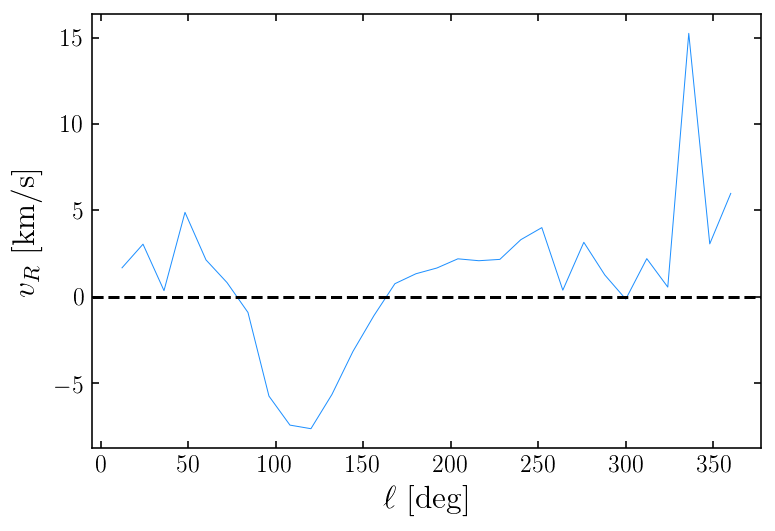

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( bin_cents, stat, color='DodgerBlue', linewidth=0.5 )

ax.set_xlabel(r'$\ell$ [deg]', fontsize=16)
ax.set_ylabel(r'$v_{R}$ [km/s]', fontsize=16)

ax.axhline(0, color='Black', linestyle='dashed')